# Math 351 Assignment 1

The first assignment contains a lot of problems about taylor series.   This is going to be absolutely crucial material for basically all of Math 351.  If it's been a long time since you thought about Taylor series, then it's time to get really, really familiar with them again.

This is also the assignment where you familiarize yourself with Jupyter Notebook, the main tool we're going to be using for our assignments, tests, and projects.  If you're reading this, you've already managed to get Jupyter installed and running on your computer.  We'll be making heavy use of the following packages:

* numpy -- a widely-used numerics package
* scipy -- a scientific computing package
* sympy -- a computer algebra system
* matplotlib.pyplot -- for drawing graphs and pictures

These are all come standard with anaconda, so you should have them installed already.

This course **will involve a lot of programming in Python**.  You will already have taken an introductory course in Python earlier in your degree - if you found that difficult, then this course is also going to be very difficult.  **Use this assignment to decide whether Math 351 is the right course for you.**


# Instructions

Do **all your work in this jupyter notebook** - please don't hand in anything handwritten.  If you want to do some math by hand, go for it - but then please type it up in markdown, just as I've done for this assignment.  Feel free to inspect the cells below to see how I typed the math formulae.

**Don't make me run your code**. Instead, run the worksheet yourself before submitting it, so that I only have to look at the output.  Then, describe what you've done in writing, so that I probably don't even need to carefully inspect the code or its output.

**Use headers** in your document: put the answer to Question 3 under a big header that says "Question 3". 

If I ask you to explain something, describe something, etc.... then it is a writing question.  **Please write in full sentences** and explain clearly.



You may use whatever pre-existing resources you like to answer these problems -- the book, the internet, etc -- but  **please cite your sources**.  At the end of your work, include a section called "References" which contains links to all internet resources you used to complete the assignment.  If you used wikipedia, say so, and give a link to the page.  If you worked with your classmates, please say who you worked with.

**You may not repost this assignment on the internet** (e.g. on a cheating site, such as chegg.com) or otherwise get someone else to do the questions for you.  If you find that someone else in the class has done this, please let me know right away.  

**Start on these assignments early**; they are time-consuming.  




# Problem 1 - Taylor's Theorem and the error term
                
(a)	 Let $f_n(x)$ represent the $n$th Taylor polynomial for $\sin x$ around the point x=0.  Using Theorem 2 (Taylor's theorem) in the text, or Corollary 1 (Taylor's theorem for $x+h$), find $n$ such that $$|f_n(2) - \sin 2| < 10^{-5}.$$   Using numpy and sympy, verify that your value of $n$ works.
            
Here's how you get sympy to find the taylor series for sin(h) - note that it won't find the error term for you; instead it includes a Big Oh error term.  You'll want to remove that, and then plug in h=2, thusly:

In [33]:
from sympy import series, sin, Symbol, Abs
h = Symbol("h")
S = series(sin(h), h, 0, 12)

print(S)
print(S.removeO())
noabs = S.removeO().subs({h:2})
abs = Abs(noabs - sin(2).evalf())
print(abs < 10**-5)

h - h**3/6 + h**5/120 - h**7/5040 + h**9/362880 - h**11/39916800 + O(h**12)
-h**11/39916800 + h**9/362880 - h**7/5040 + h**5/120 - h**3/6 + h
True


            
(b) Interpret the text's Corollary $1$ in Sec. 1.2 (p.23) in the special case where $x=0$, $h>0$, and the function in question is $f(h)=\sin(h)$.  Then, by figuring out how big $|f^{(n+1)}(h)|$ can possibly get over the interval $(-\infty,\infty)$ , give an explicit bound on the error term $E_{n+1}$, in terms of $h$, which does not have an unknown x-coordinate $\xi$ in it.

(c) Repeat part (b) but for the function $f(h) = e^h$.  You'll have to do something different to obtain a bound on $|f^{(n+1)}|$.

# A.)
|f<sub>n</sub>(2) - sin(2)| < 10<sup>-5</sup> compares the absolute error between the nth degree Taylor Polynomial and our actual function, evaluated around x=0, to the desired error threshhold of 10<sup>-5</sup>. According to Corollary 1 in the textbook, since we wish to use the Taylor polynimial formed about x=0 to evaluate the function at x=2, we can use the formula found there with h=2. Thus we get a formula for calculating our error term:  
E<sub>n+1</sub> = f<sup>n+1</sup>(xi)/(n+1)! * h<sup>n+1</sup>.  
We know that we want: E<sub>n+1</sub> < 10<sup>-5</sup>,  
so we can rewrite the above equation as:  
f<sup>n+1</sup>(xi)/(n+1)! * h<sup>n+1</sup> < 10<sup>-5</sup>  
and calculate from there. Plugging in sequentially higher n's yields a solution when **n = 11**.  
2<sup>12</sup>/12! < 10<sup>-5</sup>  
The above code proves that a value of n = 11 gives us the desired result.  

# B.)
Similar to the previous problem, we know that the series for sin(h) can be represented as the sum of all terms from k=0 to n of:  
f<sup>k</sup>(x) * h<sup>k</sup> / n! + E<sub>n+1</sub>  
E<sub>n+1</sub> = f<sup>n+1</sup>(xi) * h<sup>n+1</sup> / (n+1)!  
We know that f(h) = sin(h), so in E<sub>n+1</sub>, we know we're using the n+1<sup>th</sup> derivative of sin(xi). Thus:  
E<sub>n+1</sub> = sin<sup>n+1</sup>(xi) * h<sup>n+1</sup> / (n+1)!  
We know that the n+1<sup>th</sup> derivative of sin(xi) is always +/- sin(xi) or +/- cos(xi), so it has a maximum value of 1 on the interval $(-\infty,\infty)$, and similarly a minimum value of -1 on $(-\infty,\infty)$.  
Thus E<sub>n+1</sub> = +/- h<sup>n+1</sup> / (n+1)!  
We know that factorial functions eventually overtake exponential functions given a large enough value for n, so the eplicit bound on the error term is h<sup>n+1</sup>/(n+1)!

# C.)
Since f(h) = e<sup>h</sup>, f<sup>n+1</sup>(xi) = xi<sup>n+1</sup>e<sup>xi</sup>.  
Therefore, E<sub>k+1</sub> = xi<sup>n+1</sup>e<sup>xi</sup>/(n+1)! * h<sup>n+1</sup>.  
This can be simplified to (h * xi)<sup>n+1</sup> * e<sup>xi</sup>/(n+1)!.  
Since we know that 0 < xi < h, we may assume that, in the worst case, xi is very near h in value, but never equal. Thus xi = h serves as a least upper bound for our error. This allows us to rewrite our equation as:  
This can be simplified to h<sup>2*(n+1)</sup> * e<sup>h</sup>/(n+1)!.  
Thus the bound on our error term E<sub>k+1</sub> = h<sup>2*(n+1)</sup> * e<sup>h</sup>/(n+1)!

# Problem 2 - Taylor Series are Awesome
(a) What happens when we try to find the limit

$$\lim_{x \rightarrow 0} \frac{\sin \tan x - \tan \sin x}{\arcsin \arctan x - \arctan \arcsin x} $$
			
using the standard tools from calculus class (L'Hopital's Rule, etc)?  It's awful, so only do enough of the problem to work out what goes wrong.  If you want, you can use sympy to do some derivatives for you, like this:

            

In [6]:
from sympy import sin, tan, asin, atan
from sympy.abc import x

((sin(tan(x))-tan(sin(x)))/(asin(atan(x))-atan(asin(x)))).diff(x)

(-1/(sqrt(1 - atan(x)**2)*(x**2 + 1)) + 1/(sqrt(1 - x**2)*(asin(x)**2 + 1)))*(sin(tan(x)) - tan(sin(x)))/(asin(atan(x)) - atan(asin(x)))**2 + ((tan(x)**2 + 1)*cos(tan(x)) - (tan(sin(x))**2 + 1)*cos(x))/(asin(atan(x)) - atan(asin(x)))

# A.)
Using L'Hopital's rule, we find that the top and bottom of this forsaken fraction keep approaching some form of 0/0 and the formula continues to expand into an unusably massive equation.


(b) Using scipy/matplotlib, plot enough graphs of this function near the point $x=0$ to make a sensible conjecture of what the limit should be.  Here's how you plot a graph with matplotlib - there are of course many options (for turning on axes, labeling the x and y axes and so forth), see the documentation to get exactly what you want.
            

C:\Users\thoma\AppData\Local\Temp/ipykernel_26068/96389448.py:4: RuntimeWarning: divide by zero encountered in true_divide
  y = (np.sin(np.tan(x))-np.tan(np.sin(x)))/(np.arcsin(np.arctan(x))-np.arctan(np.arcsin(x)))
C:\Users\thoma\AppData\Local\Temp/ipykernel_26068/96389448.py:4: RuntimeWarning: invalid value encountered in true_divide
  y = (np.sin(np.tan(x))-np.tan(np.sin(x)))/(np.arcsin(np.arctan(x))-np.arctan(np.arcsin(x)))


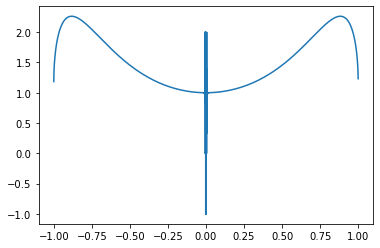

In [41]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1, 1, 0.0001)  # x values from -5 to 5, spaced by 0.1
y = (np.sin(np.tan(x))-np.tan(np.sin(x)))/(np.arcsin(np.arctan(x))-np.arctan(np.arcsin(x)))
plt.plot(x,y)
plt.show()

# B.)
It appears as though our function approaches the value y = 1.0, before abruptly encountering a vertical asymptote.  
This is also indicated by the error messages indicating a divide by zero error during the runtime of the program.

  (c) Using sympy, work out the first few terms in the Taylor series for the numerator and for the denominator in the previous problem.  Just work out enough terms to evaluate the limit in the above problem.  What is the value of the limit?  Here, once again, is how to get sympy to compute a taylor series for you:
  
  

In [42]:
from sympy import series, sin
from sympy.abc import x

series(((sin(tan(x))-tan(sin(x)))/(asin(atan(x))-atan(asin(x)))), x, 0, 6)

1 + 5*x**2/3 + 1313*x**4/1890 + O(x**6)

# C.)
The limit as x approaches 0 = 1, since all the terms in the taylor series above reduce to 0, except for the constant term (+1) at the beginning.

# Problem 3 - Horner's algorithm / synthetic division

(a) Implement Horner's algorithm, which is shown in pseudocode on Pages 7 and 8, as a python function.  The arguments should be x (a number where you'd like to evaluate the polynomial p), and a (a list of the coefficients of p). Check, using sympy, that your function is giving the right answers on a few polynomials.  

In general, if I ask you to implement an algorithm, you should do it in a python function, like this

In [8]:
def horneralg(x, a):
    n = len(a)
    b = [0] * (n-1)
    b[n-2] = a[n-1]
    for i in reversed(range(1, n-1)):
        b[i-1] = a[i] + x * b[i]
    r = a[0] + x * b[0]
    b.reverse()
    return b, r

print(horneralg(3, [-2, -5, 7, -4, 1]))

([1, -1, 4, 7], 19)


In [2]:
def completehorneralg(x, a):
    n = len(a)
    for k in range(0, n-1):
        for j in reversed(range(k, n-1)):
            a[j] = a[j] + x * a[j+1]
    a.reverse()
    return a

print(completehorneralg(3, [2, -5, 7, -4, 1]))

[1, 8, 25, 37, 23]


I mean, I didn't actually do the problem - my function returns a list of the appropriate length which contains nothing, as well as the remainder 0.  Fill in the "do some stuff" part so that it runs Horner's algorithm, and then test it on some small examples, to verify that you're getting correct results.  Feel free to use numpy arrays instead of python lists, if you prefer.

**Note:  the "stuff" you're going to do involves writing a for loop or a while loop,** and if you do not have strong programming skills, this may give you problems.  If it takes you a really, really long time to figure out how to write this loop, and you have to ask me for help multiple times to get it done, then you should seriously consider taking a different class instead of Math 351 - either a more theoretical mathematics class, or an introductory computer programming class.

(b) It's pretty clear why Horner's algorithm computes the remainder $r$, in the notation of Page 8 of the text.  But why on earth does it compute the polynomial $q$?  That is, explain why $p(t) = (t-x)q(t) + r$, where $t$ is a variable and $p,q,x,r$ are as in the text.

(c) Implement the complete Horner's algorithm, shown in pseudocode on Page 23, as a Python function, and check using sympy that it's giving correct answers.  More loops are involved, so this problem has the same disclaimer as problem (a).

# A & C.)
Code shown above.

# B.)
Honer's algorithm computes q since the algorithm is slowly unraveling a set of nested multiplication operations. Initially, we begin with n addition and n multiplication steps to form our polynomial, and each time we apply Horner's algorithm, we're peeling away one of these addition (+ r) and multiplication (t - x) steps. This leaves us with an equation formed by n-1 addition and n-1 multiplication steps. q represents this remaining polynomial and is thus naturally formed when we apply Horner's algorithm.

# Problem 4 - Rounding and systems of equations

In this problem we'll do Example 2 in Section 1.1 of the text carefully.

Consider the system of equations
\begin{align} 
0.1036x + 0.2122y &= 0.7381 \\
0.2081x + 0.4247y &= 0.9327 \\
\end{align}

on Page 4 of the textbook (that's the page number which is printed; in my version of the text it's the 29th page of the PDF).  Follow the Solution in the example, using python as a calculator.  Let's write the above equation as
\begin{align}
ax + by &= c \\
dx + ey &= f \\
\end{align}

so that $a=0.1036$, $b=0.2122$, and so on.  We're going to solve the system, by multiplying the second equation by some number $\alpha$ and subtract it from the first equation - but we're only going to keep D significant digits of the calculation throughout (to start with, D=3). That means we're going to round off the *INPUTS* and *OUTPUTS* of every arithmetic operation to D places.  So, for instance we might say something like this:

In [35]:
[a,b,c] = [0.1036, 0.2122, 0.7381]
[d,e,f] = [0.2081, 0.4247, 0.9327]
D = 19


alpha= round(round(d, D) / round(a, D), D)
print(alpha)
d = round(round(d, D) - alpha * round(a, D), D)
e = round(round(e, D) - alpha * round(b, D), D)
f = round(round(f, D) - alpha * round(c, D), D)
print(d)
print(e)
print(f)
print("y =", round(round(f, D) / round(e, D), D))

2.008687258687259
0.0
-0.0015434362934362844
-0.5499120656370656
y = 356.29074421513656


which is the value of alpha that the text book comes up with - see the line "...the *multiplier* $\alpha=0.208/0.104 \approx 2.00$..."

(a) Finish the computation -find the new coefficient of the $x$ term and the $y$ term, find the right side, and find the value of $y$.  Then change $D$, the amount of rounding - first to 4 decimals, then to enough decimals so that (in practice) no rounding is occuring at all.  See if you can duplicate the textbook's results. 

(b)  Why does this particular system of equations, with these particular numbers, behave so badly with respect to rounding? That is, if you wanted to construct another example of this phenomenon, how would you go about doing it?

(c) If rounding is so bad, why does the text say, on Page 6, that "As a rule of thumb, one should keep as many significant digits in a sequence of calculations as there are in the least accurate number involved in the computations?"




# A.)
Finishing the first computations with D = 3 gives y = -543 (very close to the textbook value)  
The next set of computaitons with D = 4 gives y = 366.6 (again close to the textbook)  
It appears as though significant digits are treated differently in the textbook than in the python code, as D = 3 produced an   alpha of 2.0, while D = 4 produced an alpha of 2.0087, which has 5 significant digits. Just an observation/heads up.  
By the time D = 7, each time we increment D by 1, the change in y's value is less than 1.
At D = 19 we are doing functionally no rounding. (no change in Y value as D is incremented)  

# B.)
Because we're working with relatively high-precision decimals that are nearly multiples of one another, rounding can produce massive errors since it tends to round off small numbers to zero, or misses a 4-th digit decimal that ends up making a subtraction operation result in a very small value instead of zero.  
If I needed to reproduce this phenomenon, I'd pick numbers that are multiples of one another down to the 4th or 5th decimal value, then change those numbers to make slight differences.  

# C.)
We must use the least # of significant digits included throughout the entire operation since we cannot assume how any data may be extended. For example, if an integer value of 2 is included, we may not assume that 2 = 2.0000, since in reality, the measurement may be 2.4899 or some other value that, in reality, is quite different from 2. Our calculations can only ever be as precise as the least accurate information we're operating on, so it's important to take careful & precise measurements.
